In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
#step 2: EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
print(df.describe())
df.isnull().sum()

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


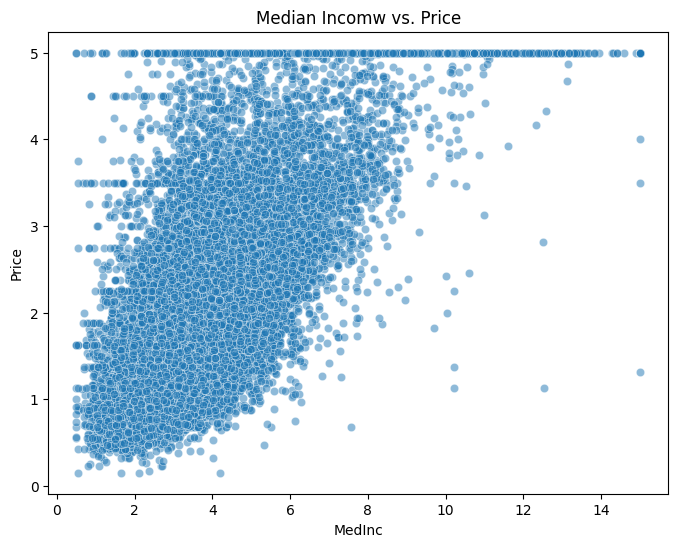

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc',y='Price',data=df,alpha=0.5)
plt.xlabel('MedInc')
plt.title('Median Incomw vs. Price')
plt.show()

In [ ]:
print('\nCorrelation with price: \n',df.corr()['Price'].sort_values())


Correlation with price: 
 Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Price         1.000000
Name: Price, dtype: float64


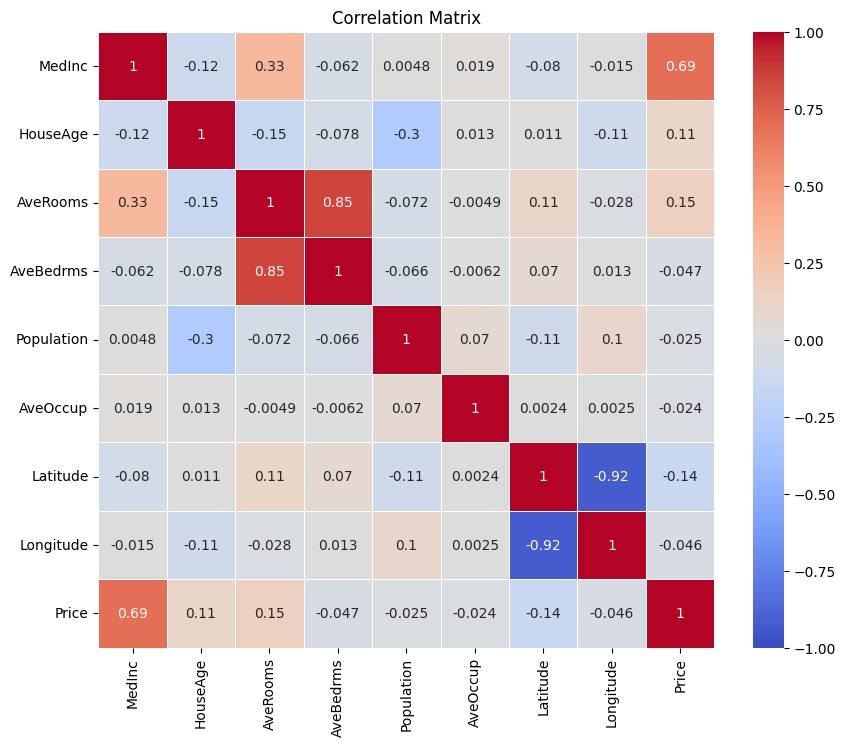

In [ ]:
#calculate corelation matrix
corr_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            annot=True, #show nums in squares
            cmap='coolwarm',
            vmin=-1,vmax=1, #range of corelation value
            square=True, #make squares uniform
            linewidths=0.5) #lines b/w squares
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#prepare Data
x=df[['MedInc']]
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)
print(f"\n Linear Equation: Price={model.coef_[0]:.2f}*MedInc+{model.intercept_:.2f}")


 Linear Equation: Price=0.42*MedInc+0.44


In [ ]:
# Predict and Evaluate
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} $100K")
print(f"Root Mean Squared Error: {rmse:.2f} $100K")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 0.63 $100K
Root Mean Squared Error: 0.84 $100K
R-squared: 0.46


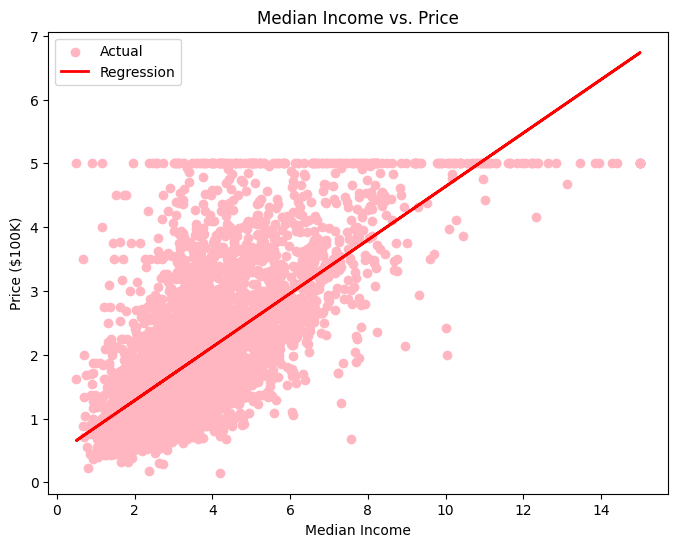

In [ ]:
# Visualize
plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='lightpink', label='Actual')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression')
plt.title('Median Income vs. Price')
plt.xlabel('Median Income')
plt.ylabel('Price ($100K)')
plt.legend()
plt.show()

In [ ]:

# Generate synthetic data
x,y = make_regression(n_samples=100, n_features=2, noise=10)
Kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

# Perform cross-validation
scores = cross_val_score(model, x, y, cv=Kf, scoring='r2')
print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())

Cross-Validation Scores: [0.98896587 0.99423474 0.99073946 0.99318537 0.99499983]
Average Score: 0.9924250545885069
